In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [4]:
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code continent       location       date  total_cases  new_cases  \
0          AFG      Asia    Afghanistan 2019-12-31          0.0        0.0   
1          AFG      Asia    Afghanistan 2020-01-01          0.0        0.0   
2          AFG      Asia    Afghanistan 2020-01-02          0.0        0.0   
3          AFG      Asia    Afghanistan 2020-01-03          0.0        0.0   
4          AFG      Asia    Afghanistan 2020-01-04          0.0        0.0   
...        ...       ...            ...        ...          ...        ...   
32120      NaN       NaN  International 2020-02-28        705.0        0.0   
32121      NaN       NaN  International 2020-02-29        705.0        0.0   
32122      NaN       NaN  International 2020-03-01        705.0        0.0   
32123      NaN       NaN  International 2020-03-02        705.0        0.0   
32124      NaN       NaN  International 2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
0               0.0         0.0                      0.0   
1               0.0         0.0                      0.0   
2               0.0         0.0                      0.0   
3               0.0         0.0                      0.0   
4               0.0         0.0                      0.0   
...             ...         ...                      ...   
32120           4.0         0.0                      NaN   
32121           6.0         2.0                      NaN   
32122           6.0         0.0                      NaN   
32123           6.0         0.0                      NaN   
32124           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
0                        0.0  ...          1.337        1803.987   
1                        0.0  ...          1.337        1803.987   
2                        0.0  ...          1.337        1803.987   
3                        0.0  ...          1.337        1803.987   
4                        0.0  ...          1.337        1803.987   
...                      ...  ...            ...             ...   
32120                    NaN  ...            NaN             NaN   
32121                    NaN  ...            NaN             NaN   
32122                    NaN  ...            NaN             NaN   
32123                    NaN  ...            NaN             NaN   
32124                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  NaN                597.029                 9.59   
1                  NaN                597.029                 9.59   
2                  NaN                597.029                 9.59   
3                  NaN                597.029                 9.59   
4                  NaN                597.029                 9.59   
...                ...                    ...                  ...   
32120              NaN                    NaN                  NaN   
32121              NaN                    NaN                  NaN   
32122              NaN                    NaN                  NaN   
32123              NaN                    NaN                  NaN   
32124              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
0                 NaN           NaN                  37.746   
1                 NaN           NaN                  37.746   
2                 NaN           NaN                  37.746   
3                 NaN           NaN                  37.746   
4                 NaN           NaN                  37.746   
...               ...           ...                     ...   
32120             NaN           NaN                     NaN   
32121             NaN           NaN                     NaN   
32122             NaN           NaN                     NaN   
32123             NaN           NaN                     NaN 

### Start date to analysis: 2020-03-01

In [5]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[(df['date'] > '2020-03-01')]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date              location  total_cases  total_deaths  new_cases  \
20175 2020-03-17               Myanmar          0.0           0.0        0.0   
62    2020-03-02           Afghanistan          1.0           0.0        0.0   
5028  2020-03-02              Cambodia          1.0           0.0        0.0   
5163  2020-03-07              Cameroon          1.0           0.0        1.0   
27613 2020-03-22             Swaziland          1.0           0.0        0.0   
...          ...                   ...          ...           ...        ...   
30016 2020-03-14  United Arab Emirates          NaN           NaN        NaN   
31266 2020-03-03               Vietnam          NaN           NaN        NaN   
31267 2020-03-04               Vietnam          NaN           NaN        NaN   
31268 2020-03-05               Vietnam          NaN           NaN        NaN   
31269 2020-03-06               Vietnam          NaN           NaN        NaN   

       new_deaths  
20175         0.0  
62            0.0  
5028          0.0  
5163          0.0  
27613         0.0  
...           ...  
30016         NaN  
31266         NaN  
31267         NaN  
31268         NaN  
31269         NaN  

[27794 rows x 6 columns]

# 1. Number of cases and deaths in World

In [6]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02      89136.0        3046.0     2094.0        67.0
1   2020-03-03      90972.0        3118.0     1836.0        72.0
2   2020-03-04      93252.0        3202.0     2280.0        84.0
3   2020-03-05      95567.0        3282.0     2315.0        80.0
4   2020-03-06      98600.0        3384.0     3033.0       102.0
..         ...          ...           ...        ...         ...
139 2020-07-19   14269303.0      602047.0   228575.0      4891.0
140 2020-07-20   14481446.0      605992.0   212143.0      3945.0
141 2020-07-21   14682791.0      610100.0   201345.0      4108.0
142 2020-07-22   14920605.0      616319.0   237814.0      6219.0
143 2020-07-23   15201538.0      623282.0   280933.0      6963.0

[144 rows x 5 columns]

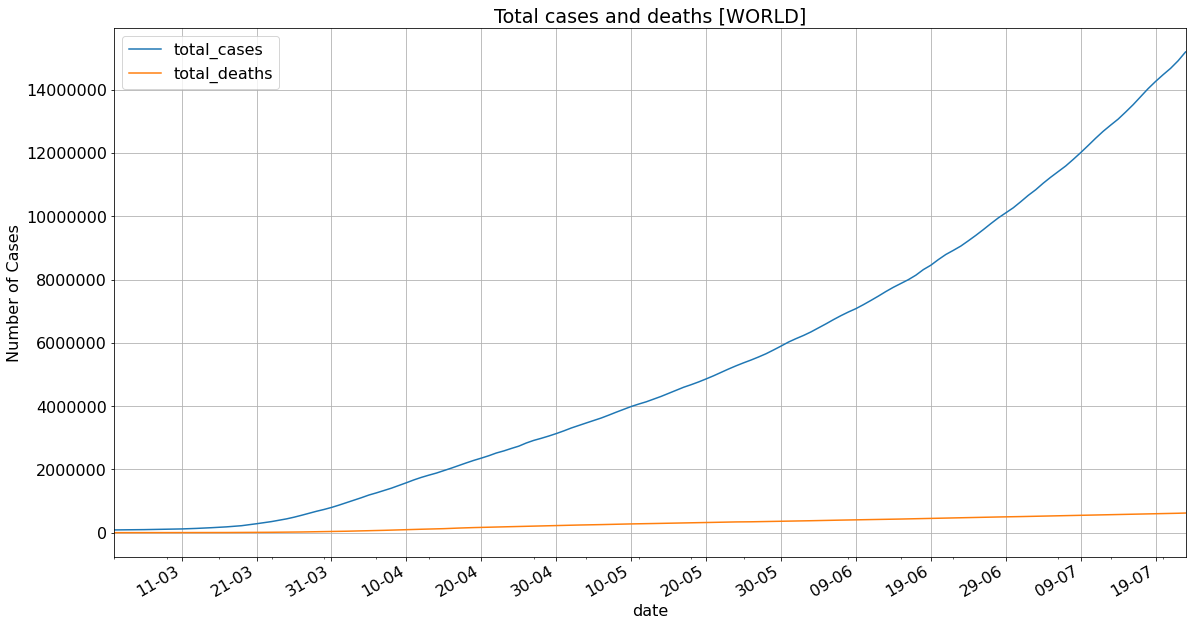

In [7]:
dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases and deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [8]:
figWorld = go.Figure()

figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_cases, name='Total Cases'))
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.total_deaths, name='Total Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left",
                                   x=0.01, traceorder='reversed', font_size=16),
                                   xaxis_tickformat = '%d-%m',
                                   title='Total Cases and Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)

figWorld.show()

### New deaths per day

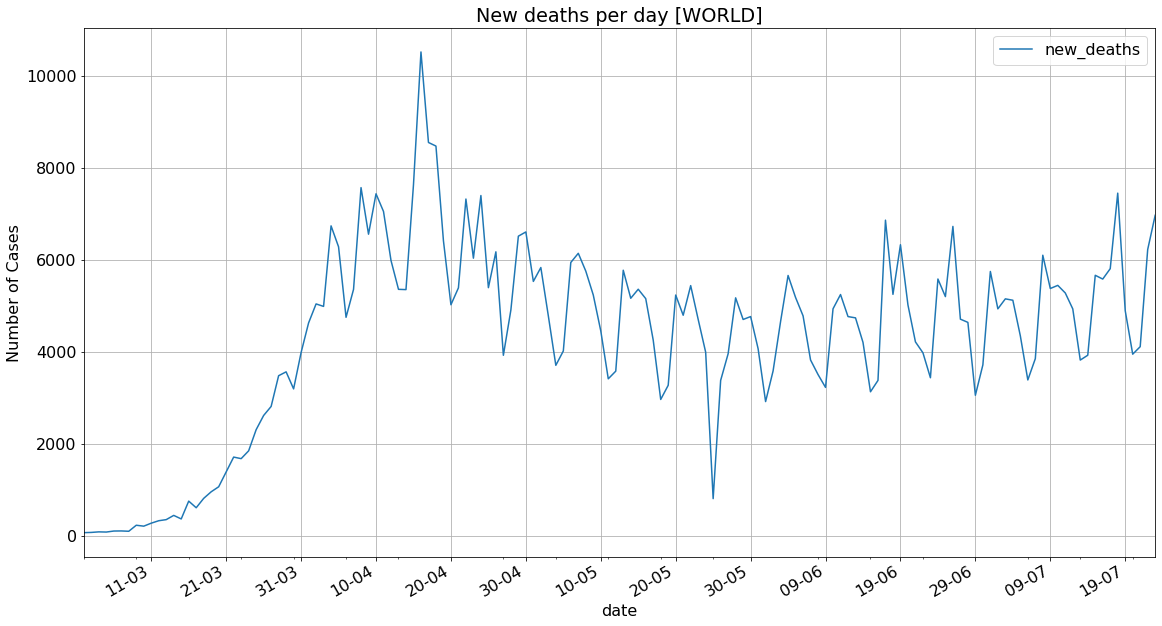

In [9]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [10]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='New Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%d-%m',
                       title='New Deaths per day [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### New cases per day

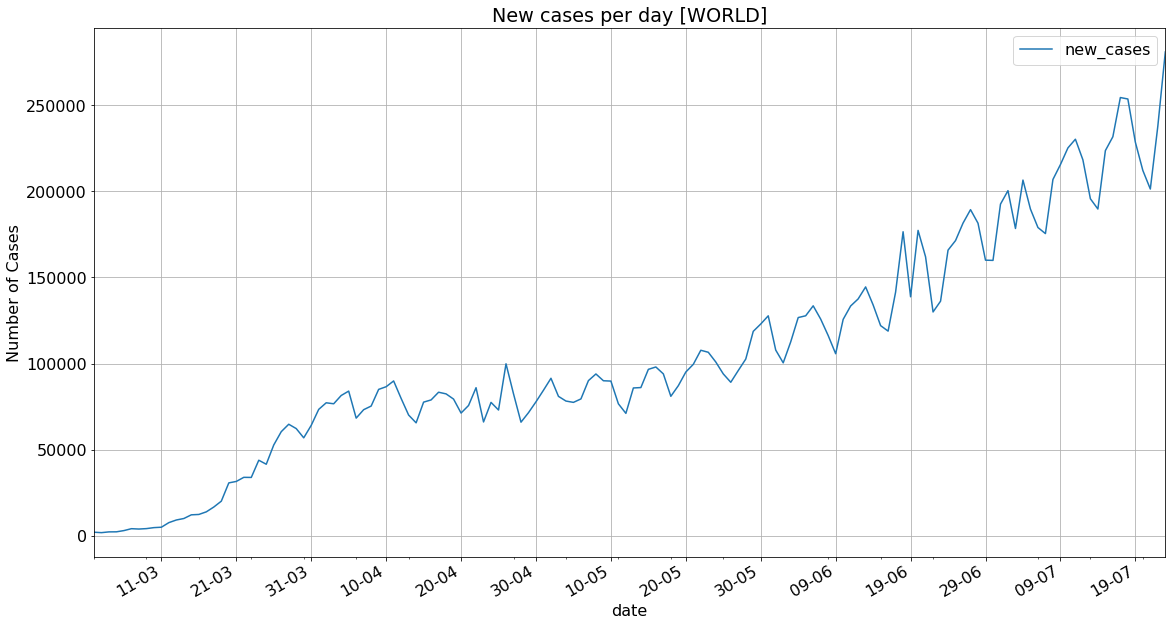

In [11]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [12]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_cases, name='New Cases'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%d-%m',
                       title='New Cases per day [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

# 2. Selecting Countries by the following conditions: 50k total cases and 35k deaths.

In [13]:
mainCountries = df[
        (df['total_cases'] > 50000) & 
        (df['total_deaths'] > 35000) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries

date       location  total_cases  total_deaths  new_cases  \
30559 2020-07-23  United_States    3970906.0      143190.0    68848.0   
30558 2020-07-22  United_States    3902058.0      142066.0    72048.0   
30557 2020-07-21  United_States    3830010.0      140906.0    56750.0   
30556 2020-07-20  United_States    3773260.0      140534.0    61796.0   
30555 2020-07-19  United_States    3711464.0      140119.0    63749.0   
...          ...            ...          ...           ...        ...   
14979 2020-07-21          Italy     244624.0       35058.0      190.0   
14978 2020-07-20          Italy     244434.0       35045.0      218.0   
14977 2020-07-19          Italy     244216.0       35042.0      249.0   
14976 2020-07-18          Italy     243967.0       35028.0      231.0   
14975 2020-07-17          Italy     243736.0       35017.0      230.0   

       new_deaths  
30559      1124.0  
30558      1160.0  
30557       372.0  
30556       415.0  
30555       853.0  
...           ...  
14979        13.0  
14978         3.0  
14977        14.0  
14976        11.0  
14975        20.0  

[228 rows x 6 columns]

In [14]:
myDate = df['date'].astype(str).unique()

In [15]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'Mexico', 'United_Kingdom', 'Italy'],
      dtype=object)

In [16]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [17]:
newDf_list=[]
for index in range(len(dfCountry)):  
    newDf = [d[index]['new_deaths']]
    header = [dfCountry[index]]
    newDf = pd.concat(newDf, axis=1, keys=header)
    newDf_list.append(newDf)

## New deaths per day in the main countries

In [18]:
dfConcat = []
for index in range(len(dfCountry)):
    dfConcat = pd.concat(newDf_list, axis=1)
dfConcat.insert(0, 'date', myDate)
dfConcat.sort_values(by=['date'], ascending=False)

date  United_States  Brazil  Mexico  United_Kingdom  Italy
102  2020-07-23          896.0  1239.0   647.0            16.0   53.0
103  2020-07-22          849.0   909.0   387.0            77.0   56.0
104  2020-07-21          767.0   892.0  1044.0           155.0   78.0
105  2020-07-20          296.0   612.0   759.0           126.0   44.0
106  2020-07-19          395.0   627.0   793.0            55.0   26.0
..          ...            ...     ...     ...             ...    ...
32   2020-03-06          915.0    58.0    39.0           652.0  760.0
22   2020-03-05          119.0     9.0     1.0            74.0  601.0
31   2020-03-04         1059.0    40.0    20.0           670.0  727.0
23   2020-03-03          211.0    12.0     8.0           149.0  743.0
1    2020-03-02            4.0     0.0     0.0             0.0   17.0

[144 rows x 6 columns]

In [19]:
toGo = dfConcat.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

### Obs.: zoom enabled

In [20]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='New deaths per day in the main countries')

figTest.show()

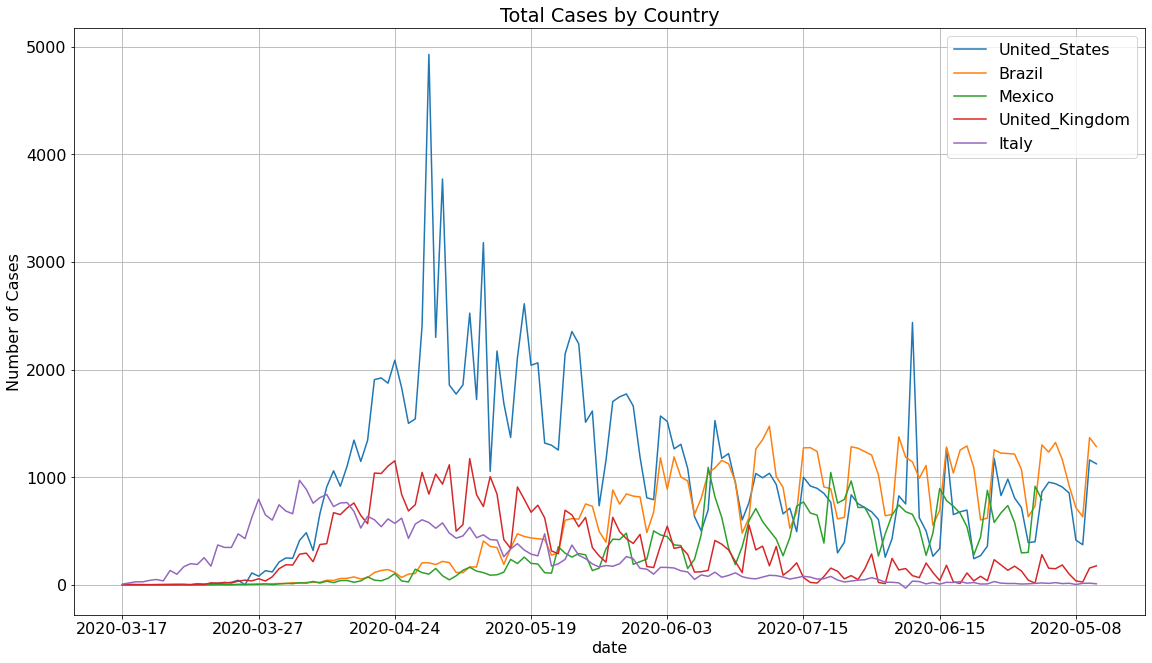

In [21]:
dfConcat.plot(x='date', y=dfCountry, figsize=(19.20,10.80))
plt.title('Total Cases by Country')
plt.ylabel('Number of Cases')
plt.grid()

### New deaths per day by country

In [22]:
fig = go.Figure()
for index in range(len(dfCountry)):
    fig = go.Figure(data=go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))
    fig.update_traces(mode="markers+lines")
    fig.update_layout(xaxis_tickformat = '%d-%m', title=dfCountry[index])
    fig.update_xaxes(nticks=25, tickangle=315)
    fig.show()

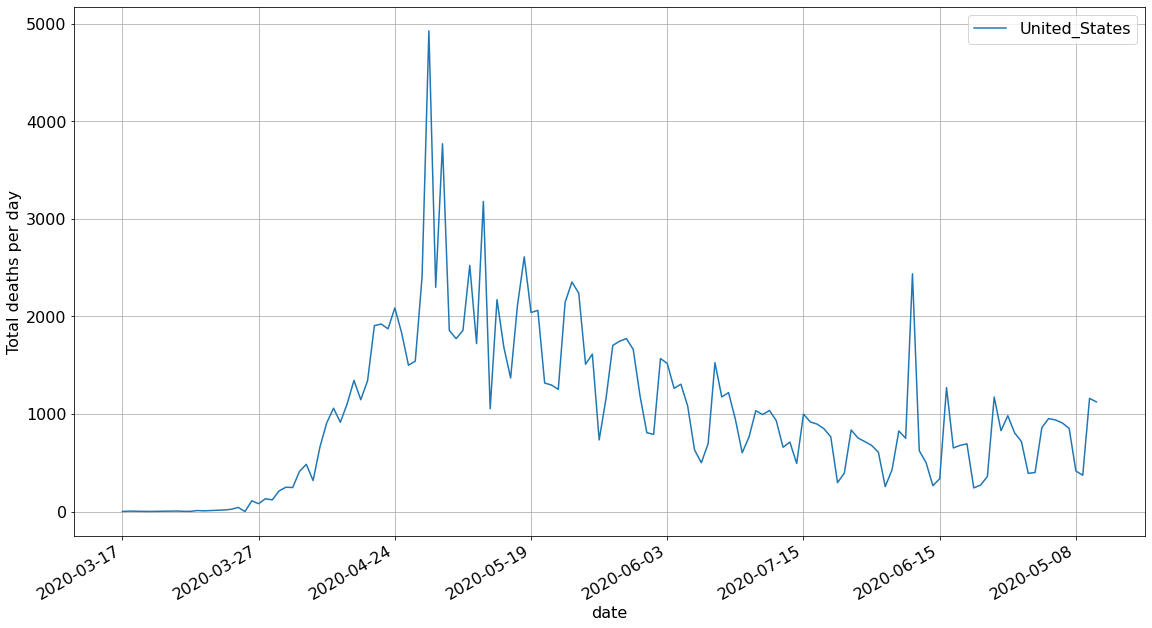

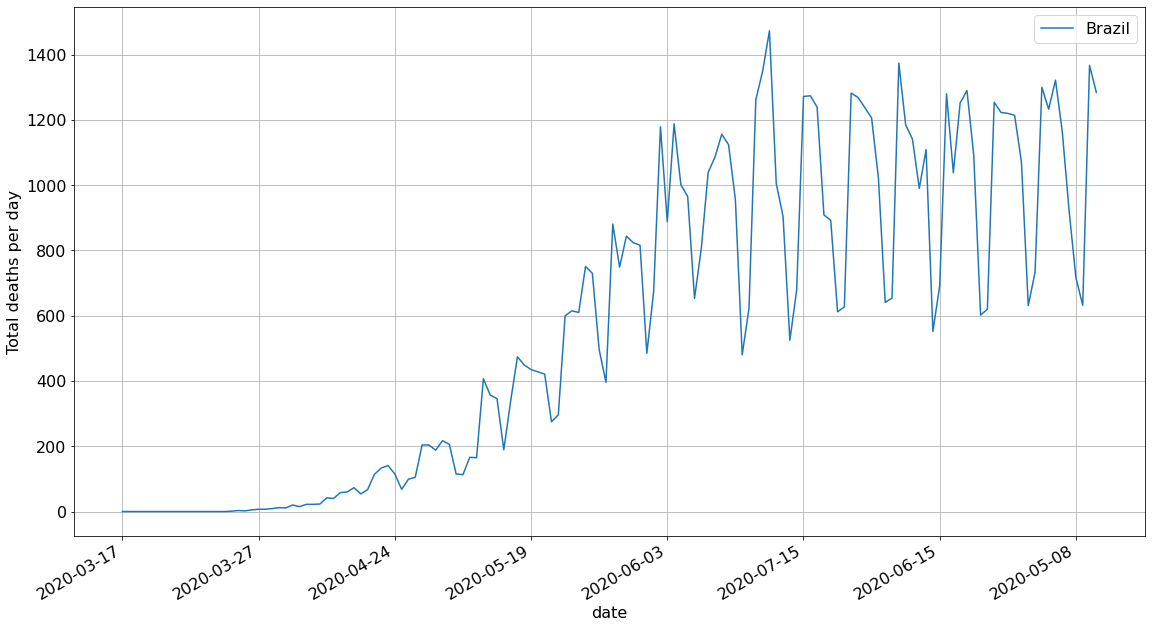

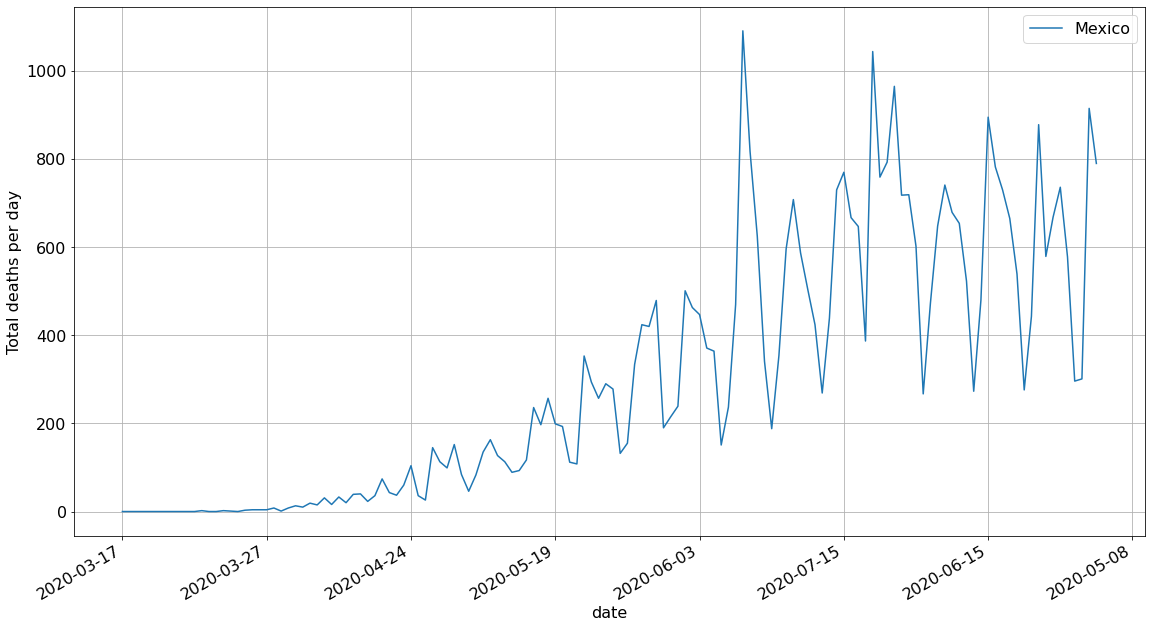

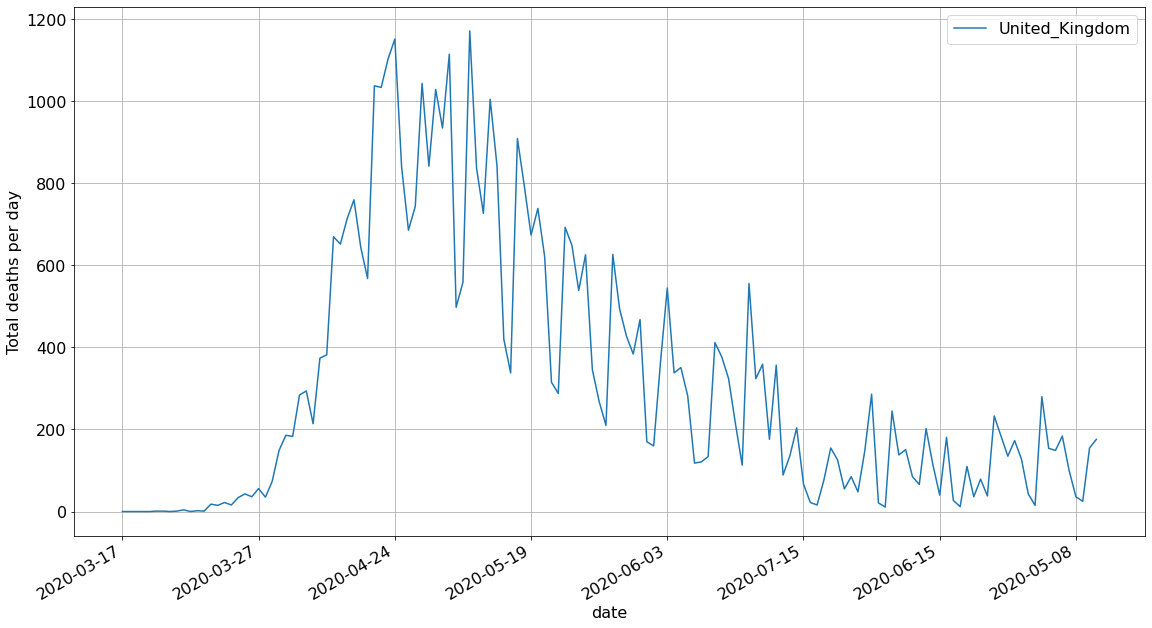

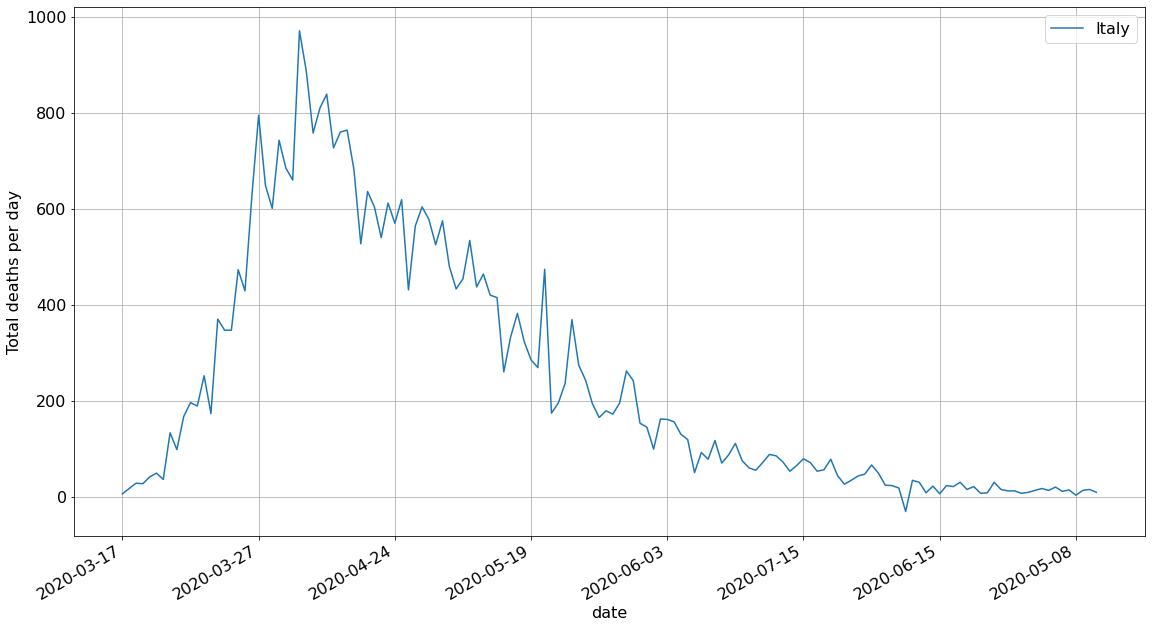

In [23]:
for index in range(len(dfCountry)):
    dfConcat.plot(x='date', y=[dfCountry[index]], figsize=(19.20,10.80))
    plt.ylabel('Total deaths per day')
    
    ax = plt.gca()
    plt.gcf().autofmt_xdate()
    plt.grid()

### Brazil Cases

In [24]:
dfBrazil = df[df['location'] == 'Brazil']
dfBrazil = dfBrazil.sort_values(by='date', ascending=True)
dfBrazil.reset_index(drop=True, inplace=True)
dfBrazil

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-02   Brazil          2.0           0.0        0.0         0.0
1   2020-03-03   Brazil          2.0           0.0        0.0         0.0
2   2020-03-04   Brazil          2.0           0.0        0.0         0.0
3   2020-03-05   Brazil          3.0           0.0        1.0         0.0
4   2020-03-06   Brazil          8.0           0.0        5.0         0.0
..         ...      ...          ...           ...        ...         ...
139 2020-07-19   Brazil    2074860.0       78772.0    28532.0       921.0
140 2020-07-20   Brazil    2098389.0       79488.0    23529.0       716.0
141 2020-07-21   Brazil    2118646.0       80120.0    20257.0       632.0
142 2020-07-22   Brazil    2159654.0       81487.0    41008.0      1367.0
143 2020-07-23   Brazil    2227514.0       82771.0    67860.0      1284.0

[144 rows x 6 columns]

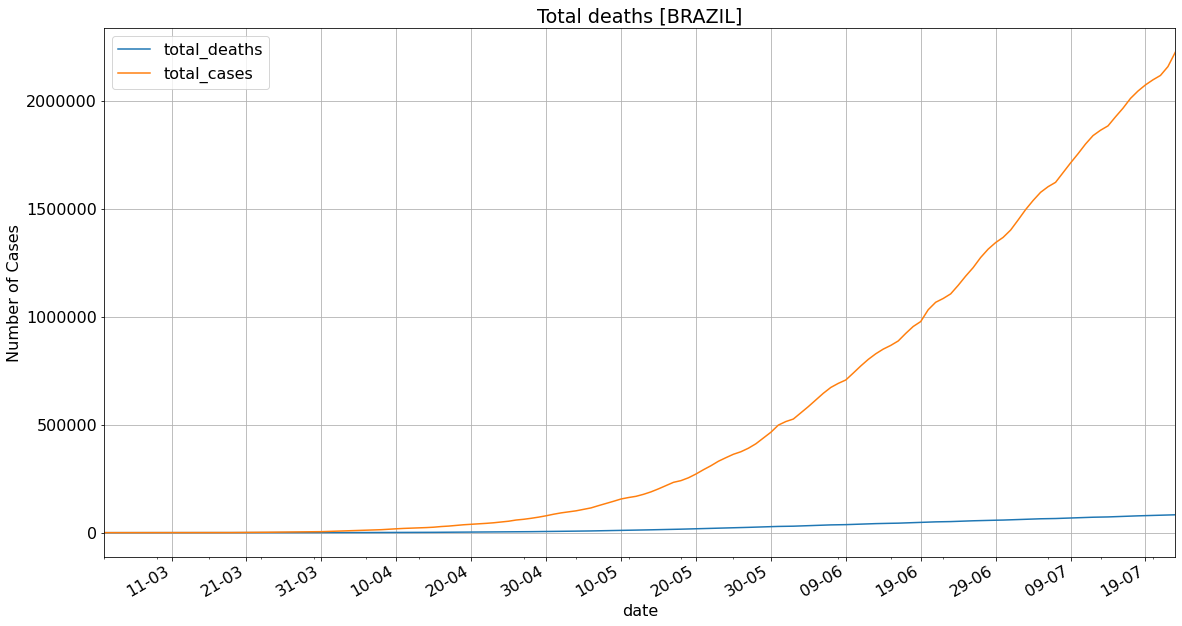

In [25]:
dfBrazil.plot(x='date', y=['total_deaths','total_cases'], figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total deaths [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

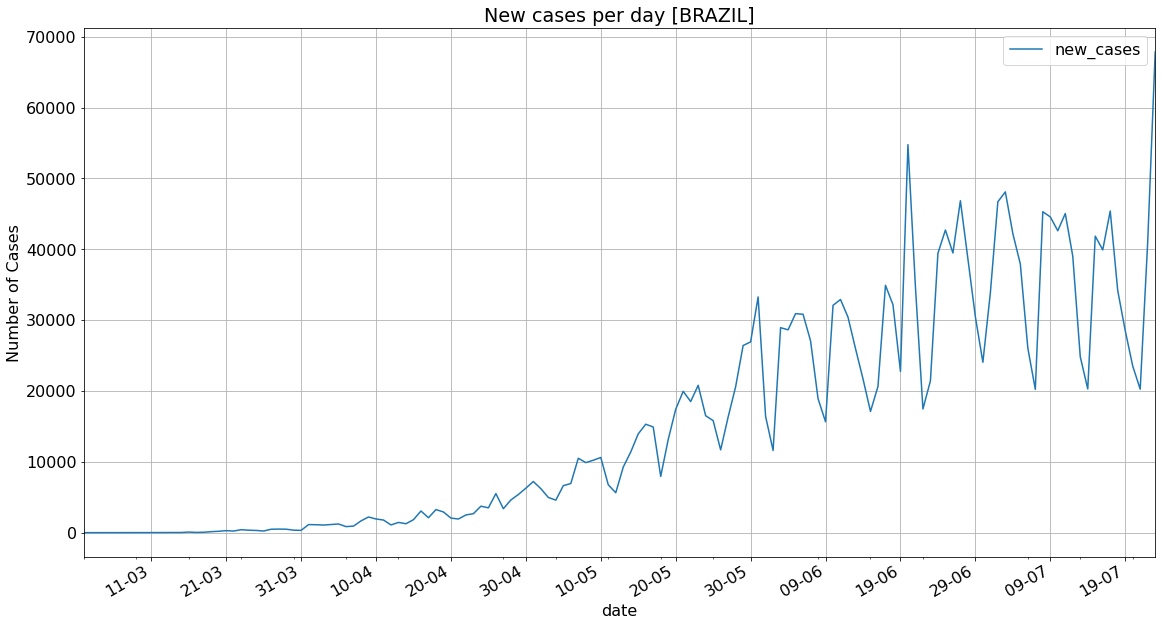

In [26]:
dfBrazil.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New cases per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

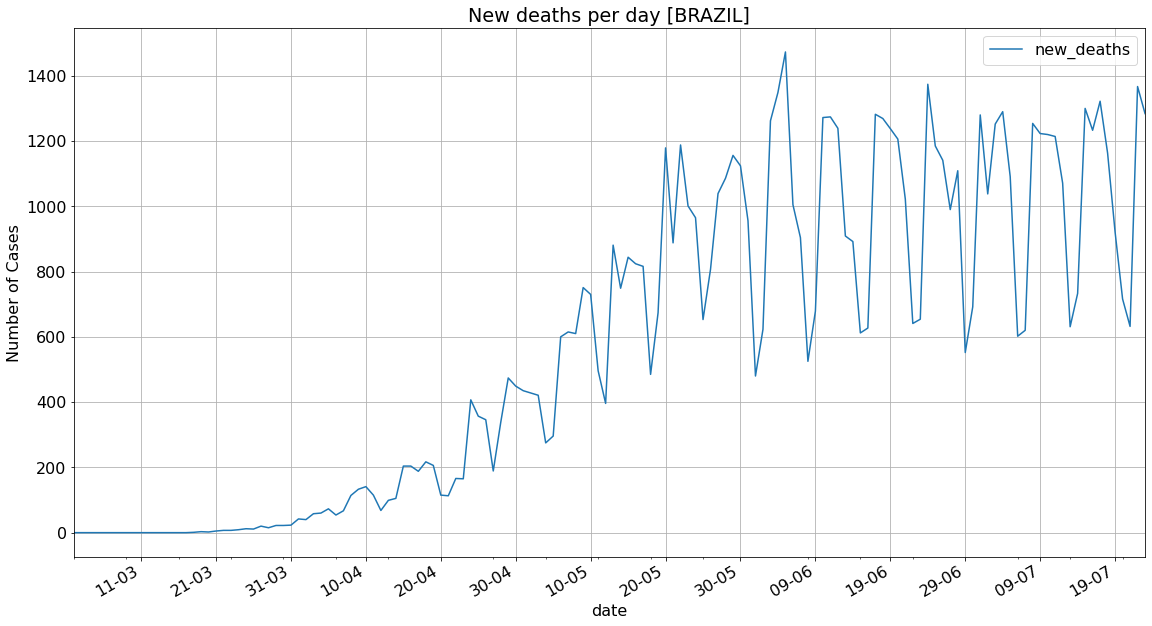

In [27]:
dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('New deaths per day [BRAZIL]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Forecast to new deaths in Brazil

In [28]:
dfBrazil = dfBrazil.loc[:,['new_deaths']]
dfBrazil = dfBrazil[
        (dfBrazil['new_deaths'] != 0)
]
dfBrazil.reset_index(drop=True, inplace=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler() 

In [31]:
train_size = int(len(dfBrazil)*0.6)
test_train = len(dfBrazil) - train_size
train = dfBrazil.iloc[0:train_size]
test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [32]:
train = scaler.fit_transform(train)
train = pd.DataFrame(train)
train.columns = ['new_deaths']

In [33]:
test = scaler.fit_transform(test)
test = pd.DataFrame(test)
test.columns = ['new_deaths']

In [34]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [53]:
time_steps = 1
X_train, y_train = create_dataset(train, train.new_deaths, time_steps)
X_test, y_test = create_dataset(test, test.new_deaths, time_steps)

In [54]:
model = keras.Sequential()
model.add(keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mse',optimizer="adam",metrics=['mse'])

In [55]:
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=1, 
    validation_split=0.01, 
    verbose=1, 
    shuffle=False
)

Epoch 1/100
74/74 [==============================] - 1s 14ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.2183 - val_mse: 0.2183
Epoch 2/100
74/74 [==============================] - 1s 11ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.1726 - val_mse: 0.1726
Epoch 3/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.1741 - val_mse: 0.1741
Epoch 4/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.1675 - val_mse: 0.1675
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.1637 - val_mse: 0.1637
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.1629 - val_mse: 0.1629
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 8/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0144 -

Epoch 63/100
74/74 [==============================] - 1s 13ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 64/100
74/74 [==============================] - 1s 12ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 65/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 66/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1645 - val_mse: 0.1645
Epoch 67/100
74/74 [==============================] - 1s 8ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1645 - val_mse: 0.1645
Epoch 68/100
74/74 [==============================] - 1s 7ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1645 - val_mse: 0.1645
Epoch 69/100
74/74 [==============================] - 1s 11ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.1644 - val_mse: 0.1644
Epoch 70/100
74/74 [==============================] - 1s 7ms/step - loss:

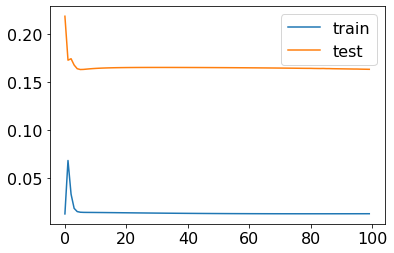

In [56]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [57]:
y_pred = model.predict(X_test)

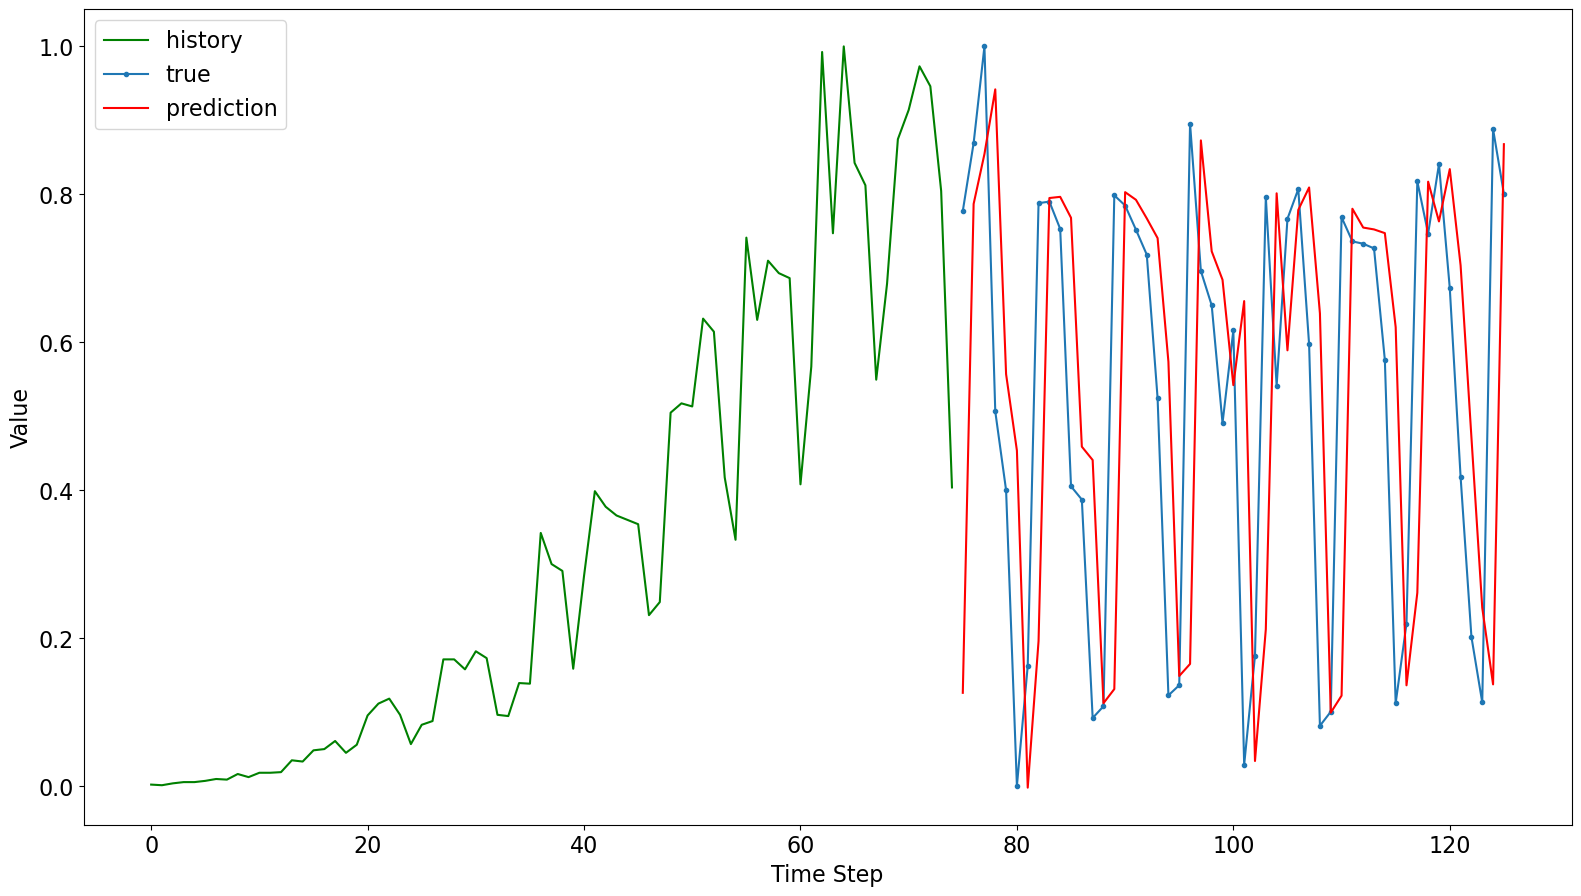

In [58]:
fig = plt.figure(figsize=(19.20,10.80),dpi=100)
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### USELESS

In [45]:
#figLocation = go.Figure()
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_States, name='United States'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Brazil, name='Brazil'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Mexico, name='Mexico'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.United_Kingdom, name='United_Kingdom'))
#figLocation.add_trace(go.Scatter(x=toGo.date, y=toGo.Italy, name='Italy'))

#figLocation.update_traces(mode="markers+lines")
#figLocation.update_layout(legend=dict(y=0.5, traceorder='reversed', font_size=16))

#figLocation.show()

In [46]:
#dfWorld.plot(x='date', y=['total_cases', 'total_deaths'], figsize=(19.20,10.80))
#plt.title('Total Cases and Deaths [WORLD]')
#plt.ylabel('Number of Cases')
#plt.xticks(rotation=45)
#plt.grid()

In [47]:
#dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))
#plt.title('New Deaths [WORLD]')
#plt.ylabel('Number of Cases')
#plt.xticks(rotation=45)
#plt.grid()

In [48]:
#fig_1 = go.Figure(data=go.Scatter(x=dfBrazil.date, y=dfBrazil.new_deaths, mode='lines+markers'))
#fig_1.update_layout(title='New Deaths [BRAZIL]', yaxis_title='Number of new deaths', 
#                    xaxis_title='Date',xaxis_tickangle=315)
#fig_1.show()

In [49]:
#dfBrazil.plot(x='date', y='new_deaths', figsize=(19.20,10.80))
#plt.title('Brazil Cases')
#plt.ylabel('Number of Cases')
#plt.grid()

In [50]:
#train_size = int(len(dfBrazil)*0.6)
#test_train = len(dfBrazil) - train_size
#train = dfBrazil.iloc[0:train_size]
#test = dfBrazil.iloc[train_size:len(dfBrazil)]

In [51]:
#mean_train_x = np.mean(train, axis = 0)
#std_train_x = np.std(train.astype(np.float64), axis = 0)
#train = (train - mean_train_x)/std_train_x

In [52]:
#mean_test_x = np.mean(test, axis = 0)
#std_test_x = np.std(test.astype(np.float64), axis = 0)
#test = (test - mean_test_x)/std_test_x